In [21]:

import pandas as pd
import plotnine as p9
from palmerpenguins import load_penguins
from plotnine import *
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
df = pd.read_csv(url)

scattered_df=df[["appeared","number_of_users","type"]]


scattered_df.dropna()
scattered_df=scattered_df[scattered_df['appeared']>1950]
scattered_df


,appeared,number_of_users,type
0,1995,5550123,pl
1,1995,5962666,pl
2,1972,3793768,pl
3,1991,2818037,pl
4,1974,7179119,queryLanguage
...,...,...,...
4298,1976,0,pl
4299,1997,0,pl
4300,1955,0,pl
4301,1977,0,pl


In [22]:
main_10_types_df=scattered_df.groupby(["type"]).agg({"number_of_users":"sum"}).reset_index()
main_10_types_df = main_10_types_df.sort_values(by="number_of_users",ascending=False).head(5)["type"]
main_10_types_df

24                    pl
27         queryLanguage
33            textMarkup
29    stylesheetLanguage
5           dataNotation
Name: type, dtype: object

In [23]:
import numpy as np

scattered_df['type'] = np.where(~scattered_df['type'].isin(main_10_types_df), 'other', scattered_df['type'])
scattered_df['type'].unique()
scattered_df


,appeared,number_of_users,type
0,1995,5550123,pl
1,1995,5962666,pl
2,1972,3793768,pl
3,1991,2818037,pl
4,1974,7179119,queryLanguage
...,...,...,...
4298,1976,0,pl
4299,1997,0,pl
4300,1955,0,pl
4301,1977,0,pl


In [24]:
scattered_df_gp = scattered_df.groupby(["appeared","type"]).agg({"number_of_users":"sum"}).reset_index()
scattered_df_gp

,appeared,type,number_of_users
0,1951,pl,60
1,1951,queryLanguage,23343
2,1952,other,0
3,1952,pl,86
4,1953,other,4200
...,...,...,...
249,2022,other,59
250,2022,pl,27096
251,2022,queryLanguage,4476
252,2022,textMarkup,3390


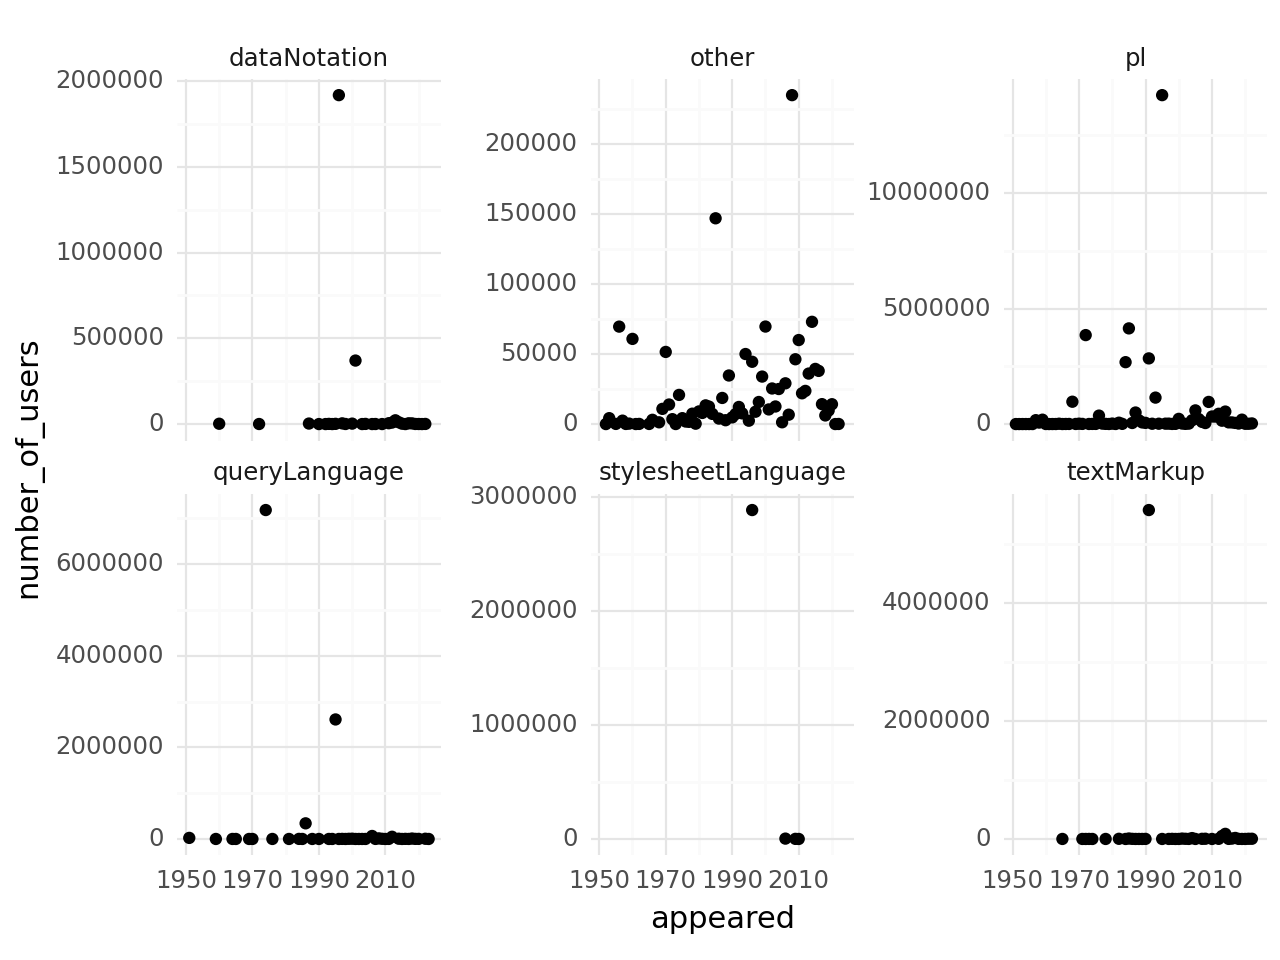

In [33]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, theme_minimal

# Create scatter plots with facets
scatter_plots = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users')) +
    geom_point() +
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots)


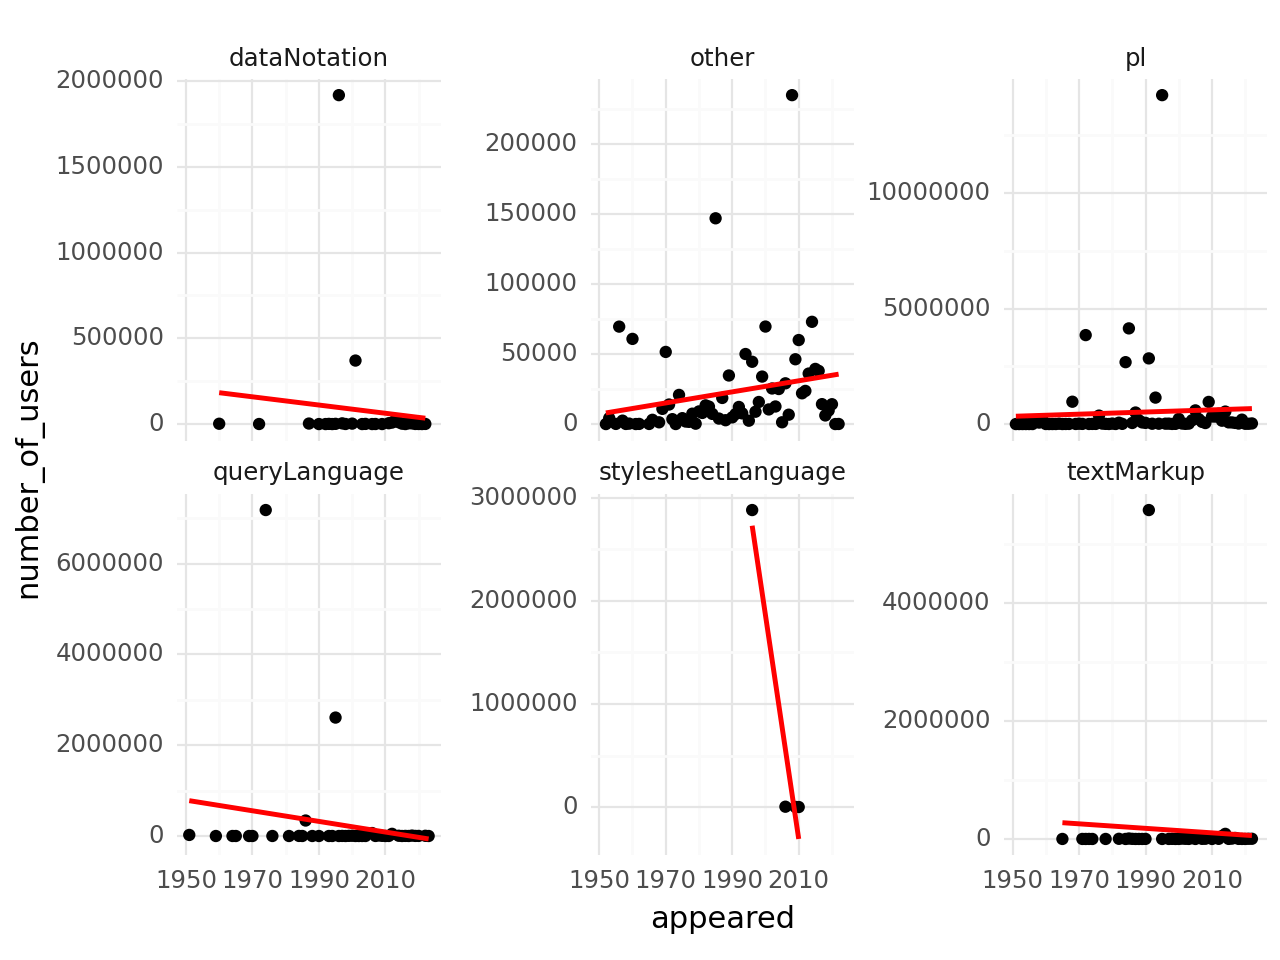

In [34]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and fitted lines
scatter_plots_with_fitted_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users')) +
    geom_point() +
    stat_smooth(method='lm', se=False, color='red') +  # Add a fitted line (linear regression)
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots_with_fitted_lines)


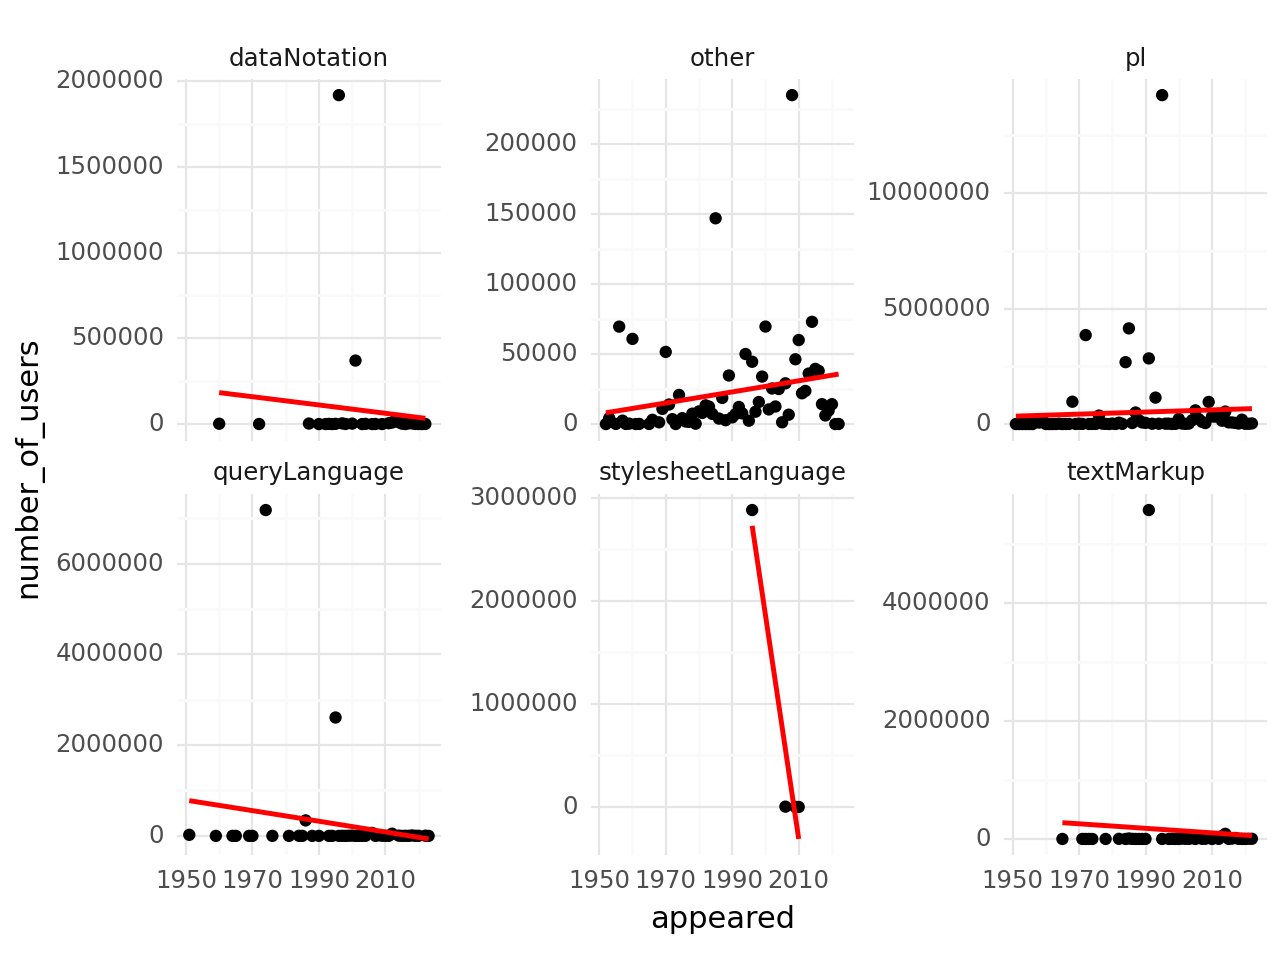

In [36]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and curved fitted lines
scatter_plots_with_curved_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users')) +
    geom_point() +
    stat_smooth(method='lm', formula='y ~ I(x**2)', se=False, color='red') +  # Add a polynomial fitted line (degree=2)
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  +# Optional: Customize the theme
   theme(figure_size=(15, 10))
)

# Show the plot
print(scatter_plots_with_curved_lines)
